## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
# import numpy as np
import pandas as pd
import ast                      # convert string to list after importing csv data
# import dask.dataframe as dd

# Libraries to pre-process data
import spacy
from gensim.models.keyedvectors import KeyedVectors

# Libraries to visualize data
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for monitoring operation process
from tqdm import tqdm

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

SEED = 6886

%matplotlib inline

## Import data

In [3]:
skill_tokens_long_df = pd.read_csv(OUTPUT_DIR + "skill_tokens_long_df.csv")
skill_tokens_long_df.iloc[:25, ]

,row_id,key_id,job_id,skill_id,column_id,column_type,skill,skill_lemma,skill_token
0,10101,101,1,1,1,job_description,ameria investment consulting company,ameria investment consult company,"['ameria', 'investment', 'consult', 'company']"
1,10201,102,1,2,1,job_description,requires high level,require high level,"['require', 'high', 'level']"
2,10301,103,1,3,1,job_description,provides highly responsible,provide highly responsible,"['provide', 'highly', 'responsible']"
3,10401,104,1,4,1,job_description,complex staff assistance,complex staff assistance,"['complex', 'staff', 'assistance']"
4,10501,105,1,5,1,job_description,chief financial officer,chief financial officer,"['chief', 'financial', 'officer']"
5,20101,201,2,1,1,job_description,irex currently seeks,irex currently seek,"['irex', 'currently', 'seek']"
6,20201,202,2,2,1,job_description,position reports directly,position report directly,"['position', 'report', 'directly']"
7,20301,203,2,3,1,job_description,cc program manager,cc program manager,"['cc', 'program', 'manager']"
8,20401,204,2,4,1,job_description,yerevan office,yerevan office,"['yerevan', 'office']"
9,20501,205,2,5,1,job_description,community connections,community connection,"['community', 'connection']"


In [4]:
skill_tokens_long_df[['skill_token']] = skill_tokens_long_df[['skill_token']].applymap(
    ast.literal_eval
)
skill_tokens_long_df.iloc[:25, ]

,row_id,key_id,job_id,skill_id,column_id,column_type,skill,skill_lemma,skill_token
0,10101,101,1,1,1,job_description,ameria investment consulting company,ameria investment consult company,"[ameria, investment, consult, company]"
1,10201,102,1,2,1,job_description,requires high level,require high level,"[require, high, level]"
2,10301,103,1,3,1,job_description,provides highly responsible,provide highly responsible,"[provide, highly, responsible]"
3,10401,104,1,4,1,job_description,complex staff assistance,complex staff assistance,"[complex, staff, assistance]"
4,10501,105,1,5,1,job_description,chief financial officer,chief financial officer,"[chief, financial, officer]"
5,20101,201,2,1,1,job_description,irex currently seeks,irex currently seek,"[irex, currently, seek]"
6,20201,202,2,2,1,job_description,position reports directly,position report directly,"[position, report, directly]"
7,20301,203,2,3,1,job_description,cc program manager,cc program manager,"[cc, program, manager]"
8,20401,204,2,4,1,job_description,yerevan office,yerevan office,"[yerevan, office]"
9,20501,205,2,5,1,job_description,community connections,community connection,"[community, connection]"


## Create embeddings

In [5]:
def create_vocab_list(df, col):
    vocab = []
    for doc in tqdm(df[col]):
        vocab.extend(doc)
    return vocab

In [6]:
tqdm.pandas(desc="Creating Job Skill Corpus")
full_vocab_list = create_vocab_list(skill_tokens_long_df, 'skill_token')

100%|█████████████████████████████████████████████████████████████████████| 257205/257205 [00:00<00:00, 2450049.42it/s]


In [7]:
print(len(full_vocab_list))
full_vocab_list[:10]

665490


['ameria',
 'investment',
 'consult',
 'company',
 'require',
 'high',
 'level',
 'provide',
 'highly',
 'responsible']

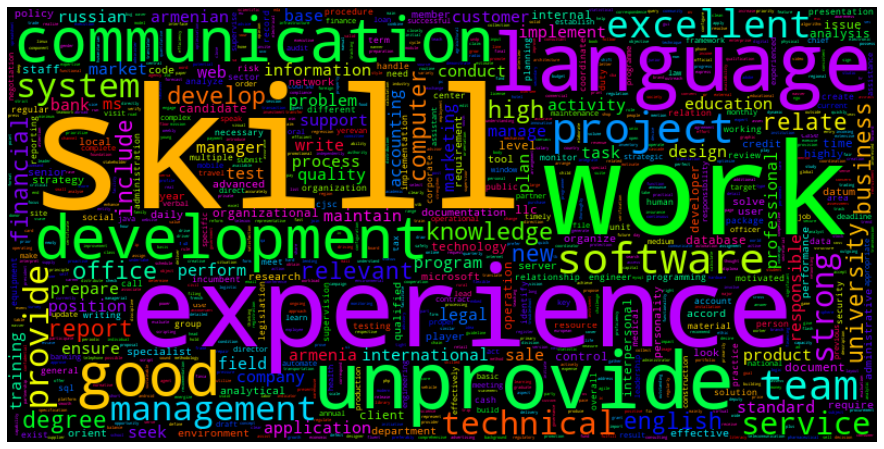

In [8]:
# Visualize the vocabulary list in Word Cloud

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",
    max_words=10000,
    #     min_font_size=9,
    #     max_font_size=80,
    prefer_horizontal=0.95,
    repeat=False,
    collocations=False,  # whether to include collocations (bigrams) of two words
    colormap=sns.color_palette("hsv", as_cmap=True),
    random_state=SEED,
)

# Generate a word cloud
wordcloud.generate(",".join(full_vocab_list))

# Visualize the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
vocab_list = list(set(full_vocab_list))
print(len(vocab_list))
vocab_list[:10]

9330


['anual',
 'mp',
 'newlita',
 'word',
 'ofcommunication',
 'librarys',
 'outpatient',
 'secretariat',
 'mark',
 'structural']

In [10]:
# load the pre-trained Stanford GloVe model in Word2Vec format (dimension 300)
pre_model = spacy.load('en_core_web_lg')

In [11]:
pre_model.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [12]:
if 'parser' in pre_model.pipe_names:
    pre_model.remove_pipe('parser')
if 'ner' in pre_model.pipe_names:
    pre_model.remove_pipe('ner')
pre_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [13]:
pre_model.max_length = 1500000

In [14]:
model_vocab = list(pre_model.vocab.strings)
type(model_vocab), len(model_vocab), model_vocab[:10]

(list,
 701570,
 ['\t', 'en', '\n', ' ', "'", "''", '"', "'Cause", 'because', "'cause"])

In [15]:
out_of_vocab = [token for token in vocab_list if token not in model_vocab]
print(len(out_of_vocab))
out_of_vocab[:10]

1381


['newlita',
 'ofcommunication',
 'mark',
 'pricewaterhousecooper',
 'eurodrug',
 'cashbook',
 'activitie',
 'idram',
 'asba',
 'rosgosstrakh']

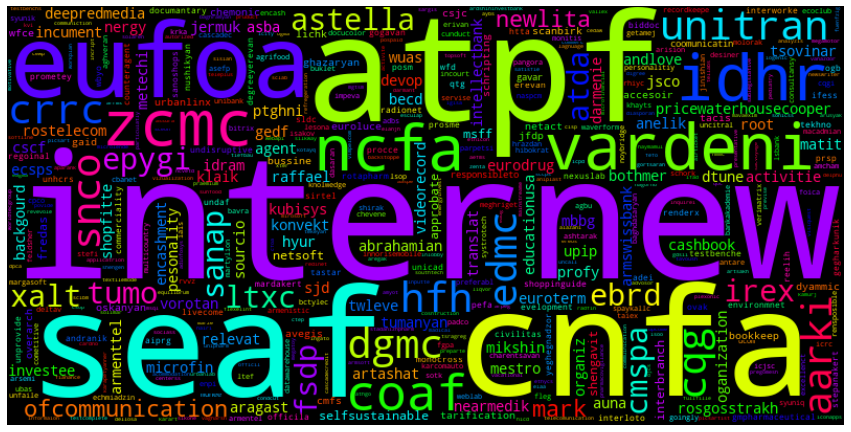

In [16]:
# Generate a word cloud
wordcloud.generate(",".join(out_of_vocab))

# Visualize the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
# Extract word embeddings from Spacy model
vector_list = []
word_list = []
for token in tqdm(vocab_list):
    if token in model_vocab:
        word_emb = pre_model(token)
        vector_list.append(word_emb.vector)
        word_list.append(token)
    else:
        continue

100%|█████████████████████████████████████████████████████████████████████████████| 9330/9330 [00:39<00:00, 235.20it/s]


In [18]:
# Store word embeddings in Gensim keyed vectors
vector_size = len(vector_list[0])
print(vector_size)

kv = KeyedVectors(vector_size=vector_size)
kv.add_vectors(keys=word_list, weights=vector_list)

300


In [19]:
# Save Gensim keyed vectors to file
kv.save(OUTPUT_DIR + 'skill_word_vectors.kv')

In [20]:
# Normalize vectors
kv.fill_norms(force=True)

# Save normalized keyed vectors to file
kv.save(OUTPUT_DIR + 'skill_word_norm_vectors.kv')